### Regression Model - Exam Scores

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# create data 
data = {
    'Midterm': [72, 50, 81, 74, 94, 86, 59, 83, 65, 33, 88, 81],
    'Final': [84, 63, 77, 78, 90, 75, 49, 79, 77, 52, 74, 90],    
}

In [3]:
# create data frame
df = pd.DataFrame(data)

In [4]:
# view data frame
df

,Midterm,Final
0,72,84
1,50,63
2,81,77
3,74,78
4,94,90
5,86,75
6,59,49
7,83,79
8,65,77
9,33,52


In [5]:
# check data type and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Midterm  12 non-null     int64
 1   Final    12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [6]:
# basic statistics
df.describe()

,Midterm,Final
count,12.000000,12.00000
mean,72.166667,74.00000
std,17.698656,13.14949
min,33.000000,49.00000
25%,63.500000,71.25000
50%,77.500000,77.00000
75%,83.750000,80.25000
max,94.000000,90.00000


Text(0, 0.5, 'Final Exam')

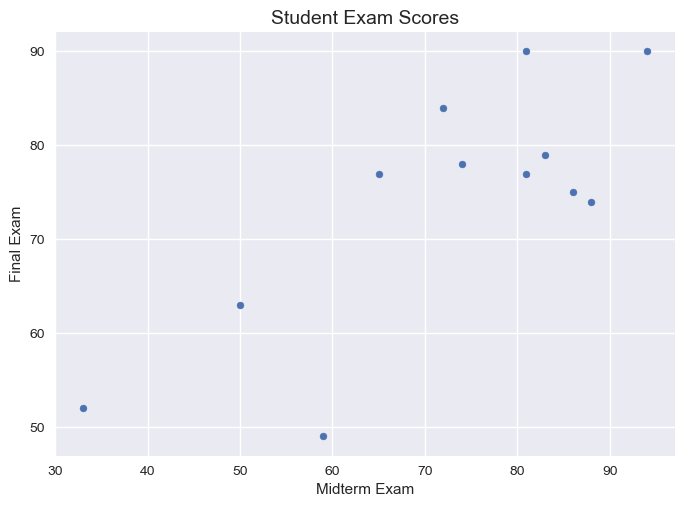

In [52]:
# scatterplot of our data
plt.style.use('seaborn-v0_8')
fix, ax = plt.subplots()
ax.scatter(df.Midterm, df.Final, s = 25)
ax.set_title('Student Exam Scores', fontsize = 14)
ax.set_xlabel('Midterm Exam')
ax.set_ylabel('Final Exam')


In [8]:
print(df.corr())

          Midterm     Final
Midterm  1.000000  0.782809
Final    0.782809  1.000000


Text(0.5, 1.0, 'Final Exam Boxplot')

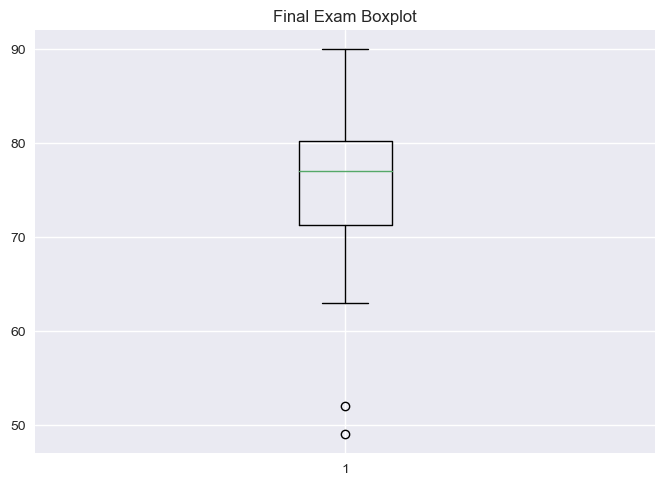

In [56]:
fig, ax = plt.subplots()
ax.boxplot(df['Final'])
ax.set_title('Final Exam Boxplot')

### Baseline Model

In [9]:
# add the line of the average y value as our projection
avg = df['Final'].mean()
print(avg)

74.0


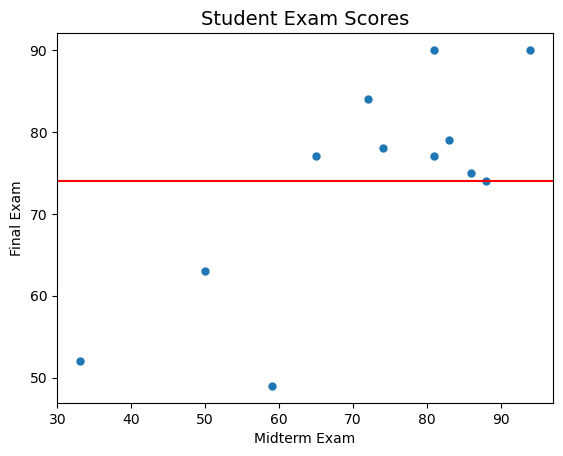

In [10]:
# scatterplot of our data
fix, ax = plt.subplots()
ax.scatter(df.Midterm, df.Final, s = 25)
ax.set_title('Student Exam Scores', fontsize = 14)
ax.set_xlabel('Midterm Exam')
ax.set_ylabel('Final Exam')
ax.axhline(y = 74, c = 'red')

In [11]:
# get distance to average final y-value
distance = []
for grade in df.Final:
    dist = 74 - grade
    distance.append(dist)
print(distance)

[-10, 11, -3, -4, -16, -1, 25, -5, -3, 22, 0, -16]


In [12]:
# square the distance
distance = [d**2 for d in distance]

In [13]:
# check values
distance

[100, 121, 9, 16, 256, 1, 625, 25, 9, 484, 0, 256]

In [14]:
# add them up - this is the squared sum of residuals (SSR)
sum(distance)

1902

In [33]:
# divide by number of observations for MSE 
mse = 1902 / 12
mse

158.5

In [50]:
# rmse 
rmse = sqrt(158.5)
rmse

12.589678312014172

### Modeling with Sklearn

In [16]:
from sklearn.linear_model import LinearRegression

In [22]:
# reshape to one dimension
X = np.array(df['Midterm']).reshape(-1, 1)
X

array([[72],
       [50],
       [81],
       [74],
       [94],
       [86],
       [59],
       [83],
       [65],
       [33],
       [88],
       [81]], dtype=int64)

In [26]:
y = df['Final']

In [27]:
# create model object
model = LinearRegression()

# fit to our  data
model.fit(X, y)

LinearRegression()

### Finding Our Equation 

y = mx + b

In [28]:
# m is the slope
m = model.coef_
m

array([0.58160008])

In [29]:
# b is the interecept or bias
b = model.intercept_
b

32.02786108155171

This means that our equation is:
+ Final Exam Score = 0.58160008 * Midterm Exam Score + 32.02786108155171

In [31]:
y_pred = model.predict(X)
y_pred

array([73.90306665, 61.10786495, 79.13746735, 75.06626681, 86.69826836,
       82.04546774, 66.34226565, 80.30066751, 69.83186611, 51.22066364,
       83.20866789, 79.13746735])

In [32]:
y

0     84
1     63
2     77
3     78
4     90
5     75
6     49
7     79
8     77
9     52
10    74
11    90
Name: Final, dtype: int64

### Plotting our Best Fit Line

Text(0, 0.5, 'final')

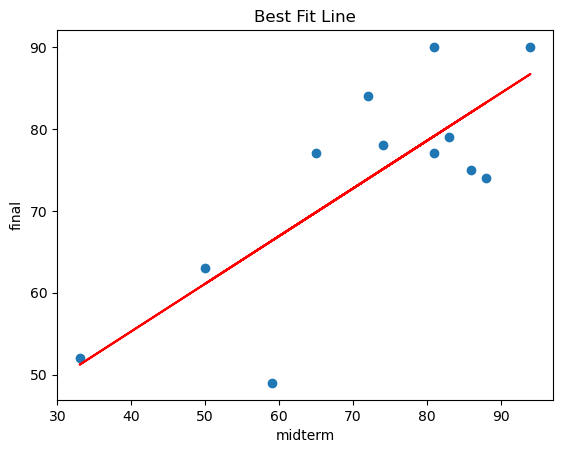

In [34]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_pred, c = 'red')
ax.set_title('Best Fit Line')
ax.set_xlabel('midterm')
ax.set_ylabel('final')

In [35]:
# prediction if someone got a 0 on midterm
model.predict(np.array(0).reshape(1, -1))

array([32.02786108])

In [89]:
# prediction if they get an 86
new_pred = model.predict(np.array(86).reshape(1, -1))
new_pred

array([82.04546774])

In [38]:
# plugging into our equation manually 
0.58160008 * 86 + 32.02786108155171

82.04546796155171

Some Intuition:
+ This equation tells us that if someone got a 0 on the midterm they would get a 32 on the final
+ For each point received on the midterm it will be increased by .58 points on the final. 
+ A person must get a 56 on the midterm to get a 65 on the final (passing grade) ( 65 = 0.58x + 32 -> x = 56) 

### Scoring Metrics

Things to do:
+ Describe MSE
+ Describe RMSE
+ Describe R^2
+ What our results tell us
+ Compare results to baseline model
+ QQ plot
+ Residual Plot

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

Earlier, we used a baseline model that predicted each final exam score to be the mean final exam score. This caused every prediction to be a 74 and resulted in a MSE of 158.5. Now that we used the Ordinary Least Squares model to make predictions, our MSE has decreased to 61. We can use the Root Mean Squared Error (RMSE) to see how far our predictions are while keeping the units in terms of final exam points by taking the square root of the MSE. We end up with a RMSE of 7.8 grade points. The baseline model had a RMSE of over 12 points so we see that this new model is more accurate and will keep predictions within a letter grade which helps educational institutions make decisions about students easier.

In [41]:
# mean squared error
mse = mean_squared_error(y, y_pred)
mse

61.372787075553845

In [42]:
# root mean squared error
rmse = mean_squared_error(y, y_pred, squared = False)
rmse

7.834078572209616

In [43]:
# r squared 
r_squared = r2_score(y, y_pred)
r_squared

0.6127899869050231

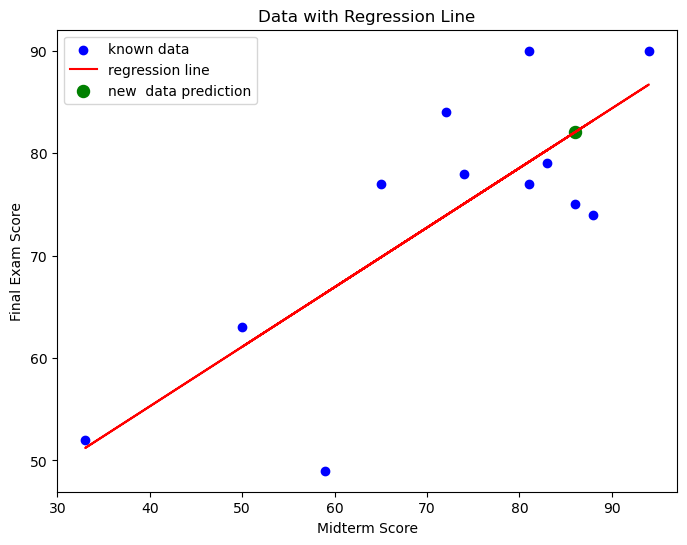

In [47]:
# plot our graph
fig, ax = plt.subplots(figsize = ((8, 6)))
# plot data
ax.scatter(X, y, c = 'blue', label = 'known data')
# plot regression line
ax.plot(X, y_pred, c = 'red', label = 'regression line')
# plot prediction of 86 on midterm
ax.scatter(86, new_pred, c = 'green', s = 75, label = 'new  data prediction')
ax.set_title('Data with Regression Line')
ax.set_xlabel('Midterm Score')
ax.set_ylabel('Final Exam Score')
ax.legend()

### Using statsmodel

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
# add constant for statsmodels
X1 = sm.add_constant(X)
# create regression model
model_2 = ols('Final ~ Midterm', data = df).fit()

# fit the model
model_2.summary()

C:\Users\ryans\anaconda_3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     15.83
Date:                Wed, 14 Feb 2024   Prob (F-statistic):            0.00261
Time:                        09:14:57   Log-Likelihood:                -41.729
No. Observations:                  12   AIC:                             87.46
Df Residuals:                      10   BIC:                             88.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.0279     10.838      2.955      0.014       7.880      56.175
Midterm        0.5816      0.146      3.978      0.003       0.256       0.907
==============================================================================
Omnibus:                        1.668   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                0.800
Skew:                          -0.626   Prob(JB):                        0.670
Kurtosis:                       2.816   Cond. No.                         324.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

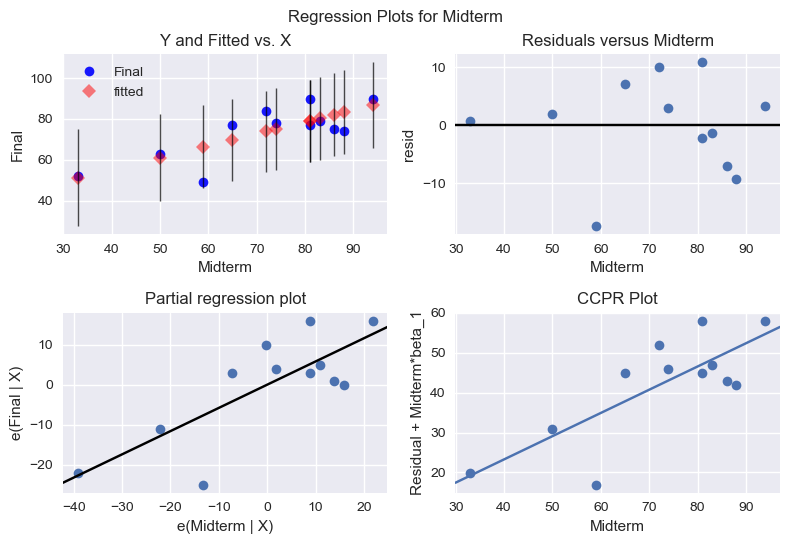

In [83]:
# regression plots
res_plot = sm.graphics.plot_regress_exog(model_2, 'Midterm')

In [84]:
# generate residuals
res = model_2.resid
res

0     10.096933
1      1.892135
2     -2.137467
3      2.933733
4      3.301732
5     -7.045468
6    -17.342266
7     -1.300668
8      7.168134
9      0.779336
10    -9.208668
11    10.862533
dtype: float64

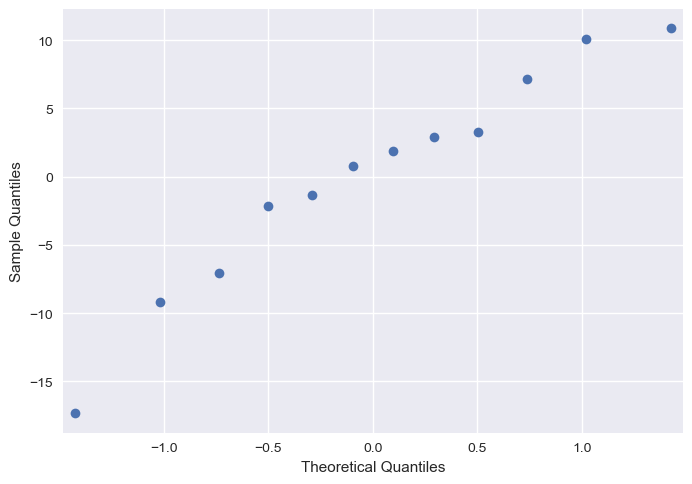

In [88]:
# Q-Q plot to determine normal distribution of residuals
fig = sm.qqplot(res)
plt.show()